In [1106]:
import torch
from autograph.lib.mcts_aut import AutStats
from autograph.lib.automata import style_agraph, AutomatonSet
from IPython.display import SVG, display
from math import log
import math

In [1107]:
checkpoint = "autograph/play/checkpoints/mine_medium_collect/no_aut_20_static_2"
#checkpoint = "autograph/play/checkpoints/multi/mine_alternating/simple_aut_no_cur_multaut_lowiter/run_3_copy"
data = torch.load(checkpoint, map_location="cpu")
#uct_num = 10
uct_num = None

In [1108]:
aset = data["aut"]

In [1109]:
data["train_loop"]["global_step"]

55274

In [1110]:
data["train_loop"]["num_rounds"]

1605

In [1111]:
astats = data["aut_stats"]

In [1112]:
%%capture
repr(astats)

In [1113]:
sobj = AutStats(len(aset.graph.network),uct_numerator=uct_num)
sobj.load_state_dict(astats)

In [1114]:
%%capture
[sobj.v(i) for i in sobj.n.indices()]

In [1115]:
sobj.baseline()

0

In [1116]:
#AutomatonSet.from_ltlf("(F W_tile) & (F X_tile) & (F Y_tile) & (F Z_tile)", ["W_tile", "X_tile", "Y_tile", "Z_tile"])

In [1117]:
def color(val):
    greenness = math.floor(val * 255)
    if greenness > 255:
        greenness = 255
    if greenness < 0:
        greenness = 0
    return "#{:02X}{:02X}00".format(255-greenness, greenness)

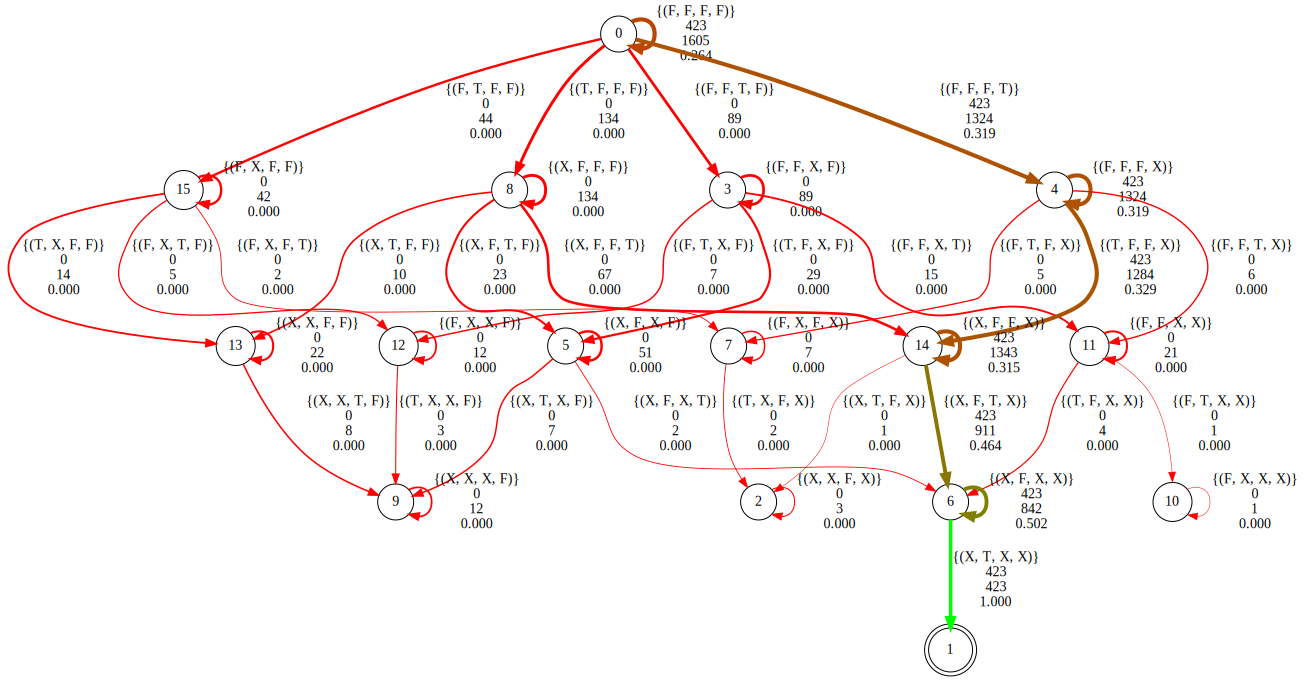

In [1118]:
g = style_agraph(aset.graph.network, [], False)
for state in sobj.n.indices():
    if g.has_edge(*state):
        if sobj.local_n[state] == 0:
            g.remove_edge(state)
            pass
        else:
            #g.get_edge(*state).attr["label"] = ""
            g.get_edge(*state).attr["label"] += ("\n%i\n%i\n%.3f" % (sobj.local_w[state], sobj.local_n[state], sobj.v(state)))
            g.get_edge(*state).attr["penwidth"] = 0.5 + (.5*log(sobj.local_n[state]))
            g.get_edge(*state).attr["color"] = color(sobj.v(state))
            pass
g.layout(prog="dot")
SVG(g.draw(format="svg"))

In [1119]:
a = list(data["net"].values())

In [1120]:
[x.shape for x in a]

[torch.Size([32, 5, 5, 5]),
 torch.Size([32]),
 torch.Size([64, 32, 5, 5]),
 torch.Size([64]),
 torch.Size([256, 6400]),
 torch.Size([256]),
 torch.Size([128, 256]),
 torch.Size([128]),
 torch.Size([128, 128]),
 torch.Size([128]),
 torch.Size([6, 128]),
 torch.Size([6]),
 torch.Size([128, 128]),
 torch.Size([128]),
 torch.Size([1, 128]),
 torch.Size([1])]